In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\X_train_con_UMAP.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\X_test_con_UMAP.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

In [5]:
len(X_train), len(X_test)

(38312, 16422)

In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from tensorflow.keras.utils import set_random_seed

In [10]:
import tensorflow as tf

In [11]:
set_random_seed(10)

In [12]:
model = Sequential([
    Dense(1000, activation="tanh", input_shape=(28,)),
    Dense(100, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              29000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 130,121
Trainable params: 130,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [14]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [15]:
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 6s 19ms/step - loss: 0.5683 - recall: 0.5725 - val_loss: 0.7536 - val_recall: 0.5505
Epoch 2/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5352 - recall: 0.6159 - val_loss: 0.6743 - val_recall: 0.6168
Epoch 3/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5270 - recall: 0.6320 - val_loss: 0.6837 - val_recall: 0.6144
Epoch 4/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5176 - recall: 0.6378 - val_loss: 0.6852 - val_recall: 0.6236
Epoch 5/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5097 - recall: 0.6567 - val_loss: 0.6853 - val_recall: 0.6449
Epoch 6/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5049 - recall: 0.6675 - val_loss: 0.6344 - val_recall: 0.6814
Epoch 7/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5011 - recall: 0.6759 - val_loss: 0.6479 - val_recall: 0.6770
Epoch 8/100
109/109 [=====

In [16]:
model_1 = Sequential([
    Dense(1000, activation="relu", input_shape=(28,)),
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              29000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 130,121
Trainable params: 130,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [18]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [19]:
model_1.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 2s 16ms/step - loss: 0.5871 - recall_1: 0.5003 - val_loss: 0.7586 - val_recall_1: 0.5624
Epoch 2/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5287 - recall_1: 0.6362 - val_loss: 0.6472 - val_recall_1: 0.6610
Epoch 3/100
109/109 [==============================] - 1s 6ms/step - loss: 0.5125 - recall_1: 0.6608 - val_loss: 0.6745 - val_recall_1: 0.6334
Epoch 4/100
109/109 [==============================] - 1s 5ms/step - loss: 0.5030 - recall_1: 0.6673 - val_loss: 0.6545 - val_recall_1: 0.6603
Epoch 5/100
109/109 [==============================] - 1s 6ms/step - loss: 0.4956 - recall_1: 0.6795 - val_loss: 0.6782 - val_recall_1: 0.6506
Epoch 6/100
109/109 [==============================] - 1s 6ms/step - loss: 0.4908 - recall_1: 0.6892 - val_loss: 0.6102 - val_recall_1: 0.6997
Epoch 7/100
109/109 [==============================] - 1s 6ms/step - loss: 0.4868 - recall_1: 0.6983 - val_loss: 0.6164 - val_recall_1: 0.695

In [22]:
preds = model.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [23]:
preds_1 = model_1.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [24]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [25]:
def treshold_05(x):
  if x > 0.5:
    return 1
  return 0

In [26]:
preds_05 = np.vectorize(treshold_05)(preds)
preds_1_05 = np.vectorize(treshold_05)(preds_1)

In [27]:
recall_score(y_test, preds_05)

0.7354767994154183

In [28]:
accuracy_score(y_test, preds_05)

0.7604433077578857

In [29]:
recall_score(y_test, preds_1_05)

0.7444890999878212

In [30]:
accuracy_score(y_test, preds_1_05)

0.7576421873097064

In [31]:
cm_05 = confusion_matrix(y_test, preds_05)

In [32]:
cm_1_05 = confusion_matrix(y_test, preds_1_05)

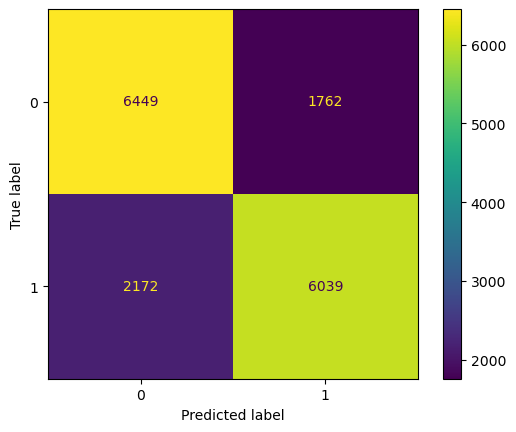

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_05)
disp.plot()

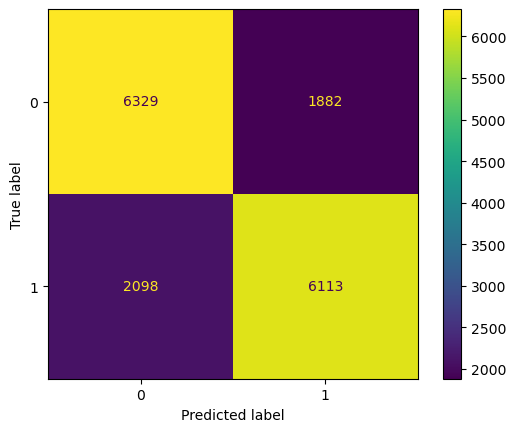

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_05)
disp.plot()

In [35]:
def treshold_03(x):
  if x > 0.3:
    return 1
  return 0

In [36]:
preds_03 = np.vectorize(treshold_03)(preds)
preds_1_03 = np.vectorize(treshold_03)(preds_1)

In [37]:
recall_score(y_test, preds_03)

0.897211058336378

In [38]:
accuracy_score(y_test, preds_03)

0.7510047497259773

In [39]:
recall_score(y_test, preds_1_03)

0.8811350627207405

In [40]:
accuracy_score(y_test, preds_1_03)

0.7570332480818415

In [41]:
cm_03 = confusion_matrix(y_test, preds_03)

In [42]:
cm_1_03 = confusion_matrix(y_test, preds_1_03)

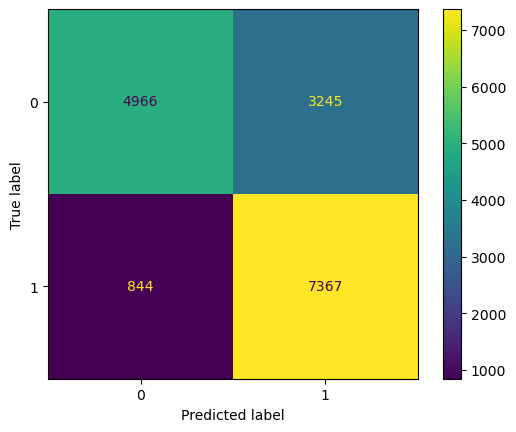

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_03)
disp.plot()

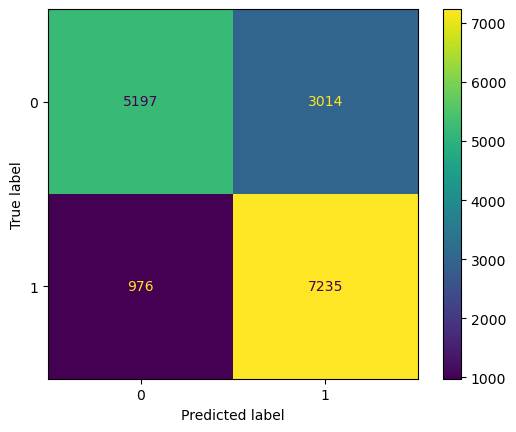

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_03)
disp.plot()